### Hurst Exponent

- Time series is

    1. persistent with $H \geq 0.5$ : trend  
    2. $H < 0.5$ : reverse the trend  
    3. $H = 0.5$ (near 0.5) : random walk

#### How to calculate the H?

* Step1: Calculate R/S<br>
<br>

    1. Ranges
        * Let me have 15000 daily returns
        * Range 2: 15000/2
        * Range n: 15000/n<br>
    <br>
    
    2. Mean of each range
        * 각 range별 평균값 구함
        * 예를 들어, range를 1,2,3,4,5,6,10,20,30으로 정했다면 1+2+3+...+20+30 = 81개의 mean 값을 구함
        * $mean_s = m_s = \frac{1}{n} \sum_{i=1}^{n} X_i$
            - s = series
            - n = the size of the range 
            - X = one element in the range<br>
    <br>
    
    3. Deviations for each range
        * $Y_t = X_t - m;\; for\; t=1,2,...n $
            - X = one element in the range
            - m = mean for the range<br>
    <br>
    
    4. Total of the deviations  
        * $y = \sum_{i=1}^{t}Y_t$
        * 각 range별 deviaion 값의 합
        * 값이 클수록 해당하는 range의 deviation이 큼<br>
    <br>
    
    5. Widest difference
        * $R_t = max(Y_1, Y_2,..., Y_t) - min(Y_1, Y_2,..., Y_t); \; for \; t=1,2,...,n$
        * 위의 예시에서 R 값은 81개<br>
    <br>
    
    6. Standard deviation for each range
        * $\sigma = \sqrt{\frac{1}{t} \sum_{i=1}^{t}{(X_i - m)}^2}; \; for \;t=1,2,...,n$<br>
    <br>
    
    7. Rescaled range
        * $rescaled range = \left( \frac{R}{S} \right)_t = \frac{R_t}{\sigma_t}; \; for \; t=1,2,...,n$<br>
    <br>
    
    8. Average rescaled range
        * 각 range 별 rescaled range의 평균을 구함
        * 위의 예시에서 9개 카테고리별 R/S의 평균값<br>
    <br>
    <br>
    <br>
    
* Step2: Hurst Exponent<br>
<br>

    1. Calculate the logarithmic values of size and R/S<br>
    <br>
    
    2. Plot the 1. of each series 
        * x-axis: log(size)
        * y-axis: log(R/S)<br>
    <br>
    
    3. Calculate the slope of 2.
        * 예를 들어 20년 1월부터 12월까지 기울기가 0.49이면 이 기간동안은 random process를 보였다고 해석
    

In [68]:
# Hurst exponent Code

import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from typing import Union
import statsmodels.api as sm
from statsmodels.regression.linear_model import OLS

In [148]:
def cal_R_S(df):
    
    z = np.cumsum(df - df.mean())
    R = np.max(z) - np.min(z)
    S = df.std()
    
    return np.divide(R, S)

In [152]:
def hurst_exponent(range_, df):
    size = []
    R_S = []

    for i in range_:
        tmp_list = []

        for j in np.array_split(df, i):
            tmp_list.append(cal_R_S(j))
        R_S.append(np.log(np.mean(tmp_list)))
        size.append(np.log(len(j)))
    
    results = OLS(R_S, size).fit()
    
    return results.params[0], results.rsquared

In [184]:
data = yf.download('005930.KS', '2000-01-01', '2021-9-30')

[*********************100%***********************]  1 of 1 completed


In [174]:
dt = dt['Close'].pct_change().dropna()

In [198]:
dt = dt.iloc[-500:]

In [203]:
h_df = pd.DataFrame(columns = ['hurst_exp'])

for i in range(0, len(dt)-65, 65):
    df = dt[i:i+65]
    h_df.loc[df.index[0]] = hurst_exponent([1,3,6,12,22], df)[0]

In [204]:
h_df_t = h_df.loc[h_df['hurst_exp']>0.5].index
h_df_mr = h_df.loc[h_df['hurst_exp']<0.5].index

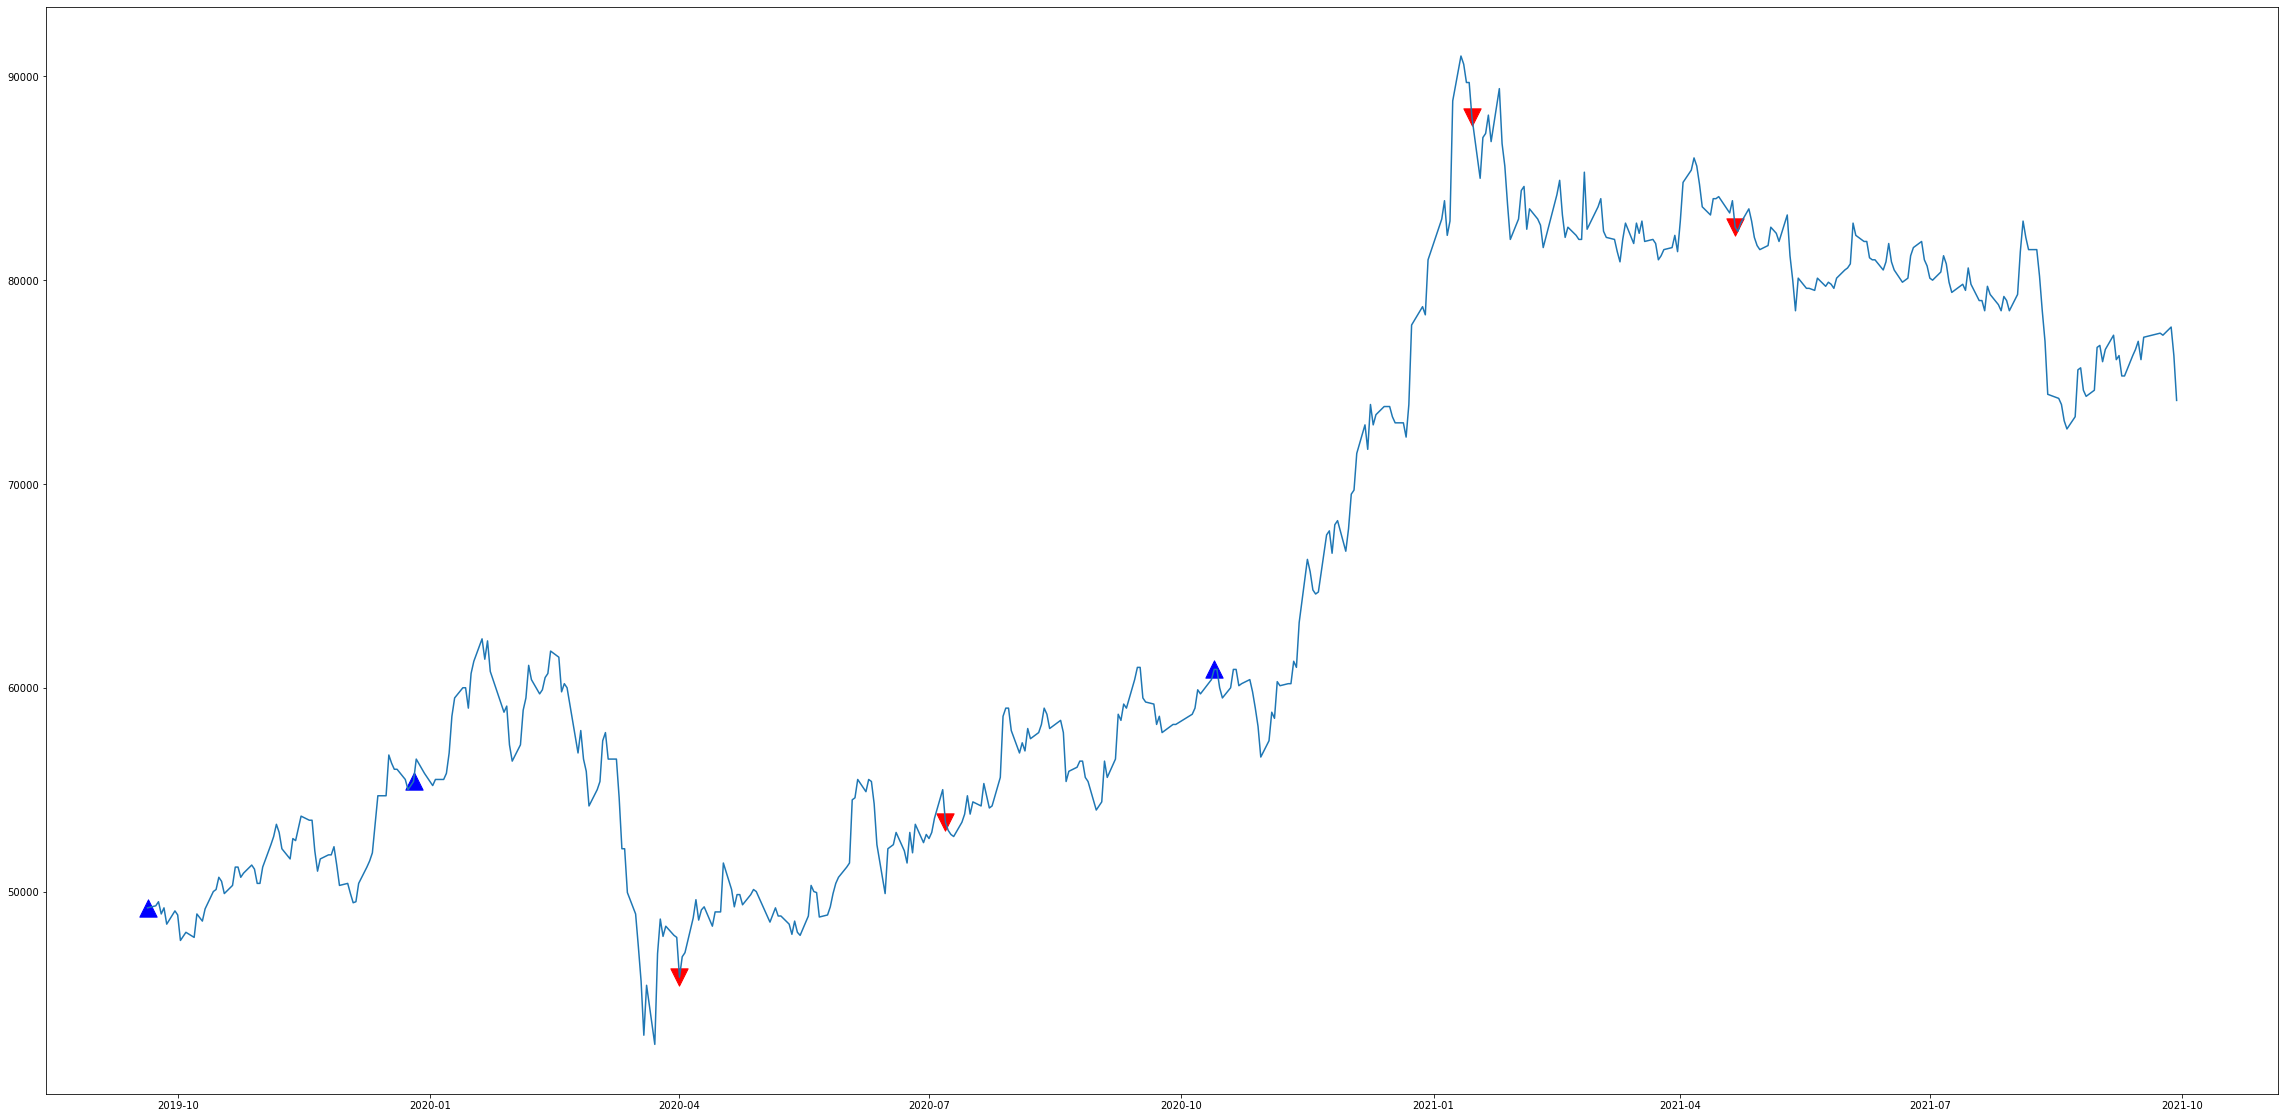

In [221]:
plt.figure(figsize=(40, 20))
plt.plot(data['Close'].iloc[-500:])
plt.scatter(h_df_t, data.Close.loc[h_df_t], color='blue', marker='^', s=300)
plt.scatter(h_df_mr, data.Close.loc[h_df_mr], color='red', marker='v', s=300)
plt.show();